C:\Users\User\AppData\Local\Temp\ipykernel_1888\177487037.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['amt_weekends'].fillna(data['amt_weekends'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1888\177487037.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Linear Regression Accuracy: 0.24842934314932597
Polynomial Regression (2nd degree) Accuracy: -59876665669.266975
Lasso Regression Accuracy: 0.0007749167745029206
Ridge Regression Accuracy: 0.24992545277100897
SVM Accuracy: 0.8436578171091446
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0

Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       258
           1       0.96      0.28      0.44        81

    accuracy                           0.83       339
   macro avg       0.89      0.64      0.67       339
weighted avg       0.85      0.83      0.79       339

Linear Regression Confusion Matrix:
[[257   1]
 [ 58  23]]

Polynomial Regression Classification Report:


g:\ggsoc\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\ggsoc\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\ggsoc\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\ggsoc\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMet

              precision    recall  f1-score   support

    -1087846       0.00      0.00      0.00         0
     -475242       0.00      0.00      0.00         0
     -444979       0.00      0.00      0.00         0
     -382998       0.00      0.00      0.00         0
     -342748       0.00      0.00      0.00         0
     -213584       0.00      0.00      0.00         0
     -169075       0.00      0.00      0.00         0
     -142201       0.00      0.00      0.00         0
     -107184       0.00      0.00      0.00         0
      -72886       0.00      0.00      0.00         0
      -21145       0.00      0.00      0.00         0
          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.90      0.87      0.88       258
           1       0.81      0.47      0.59        81
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00    

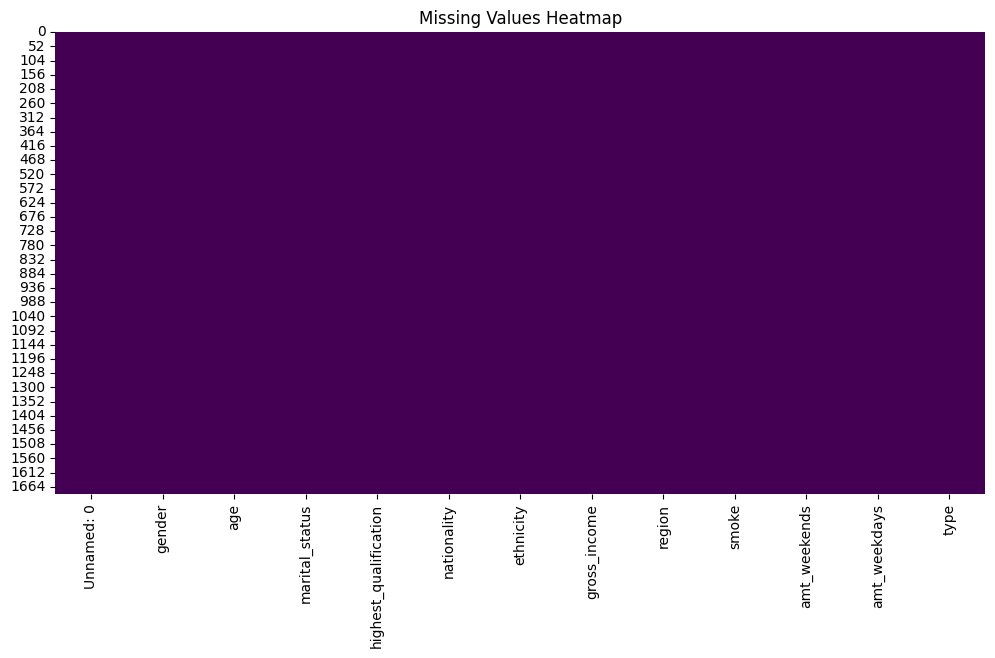

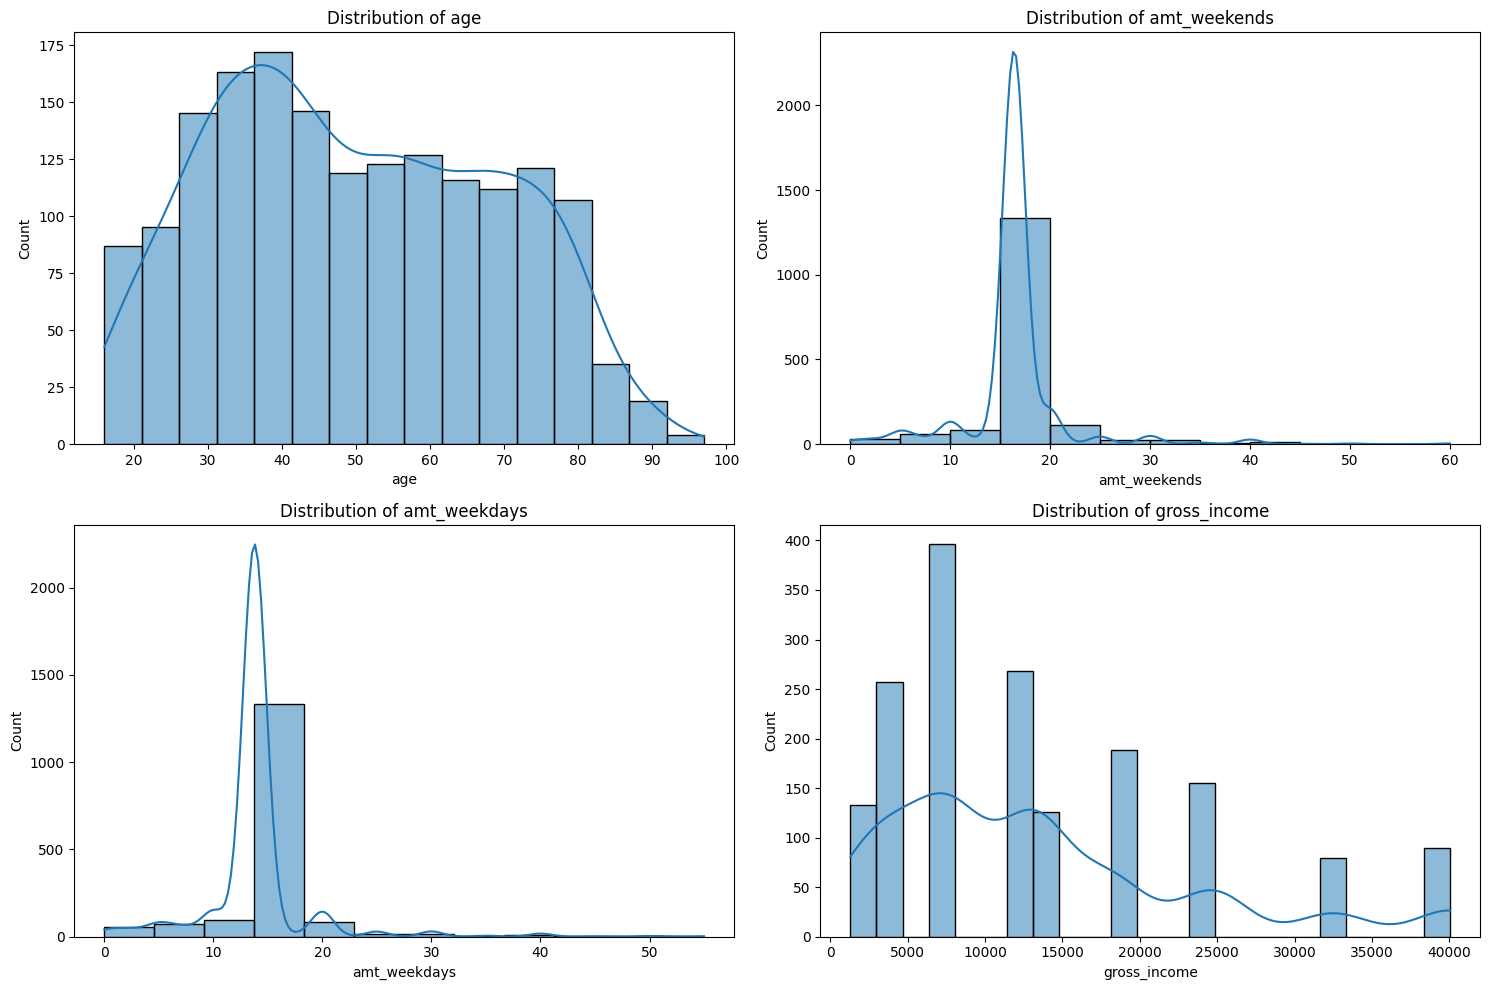

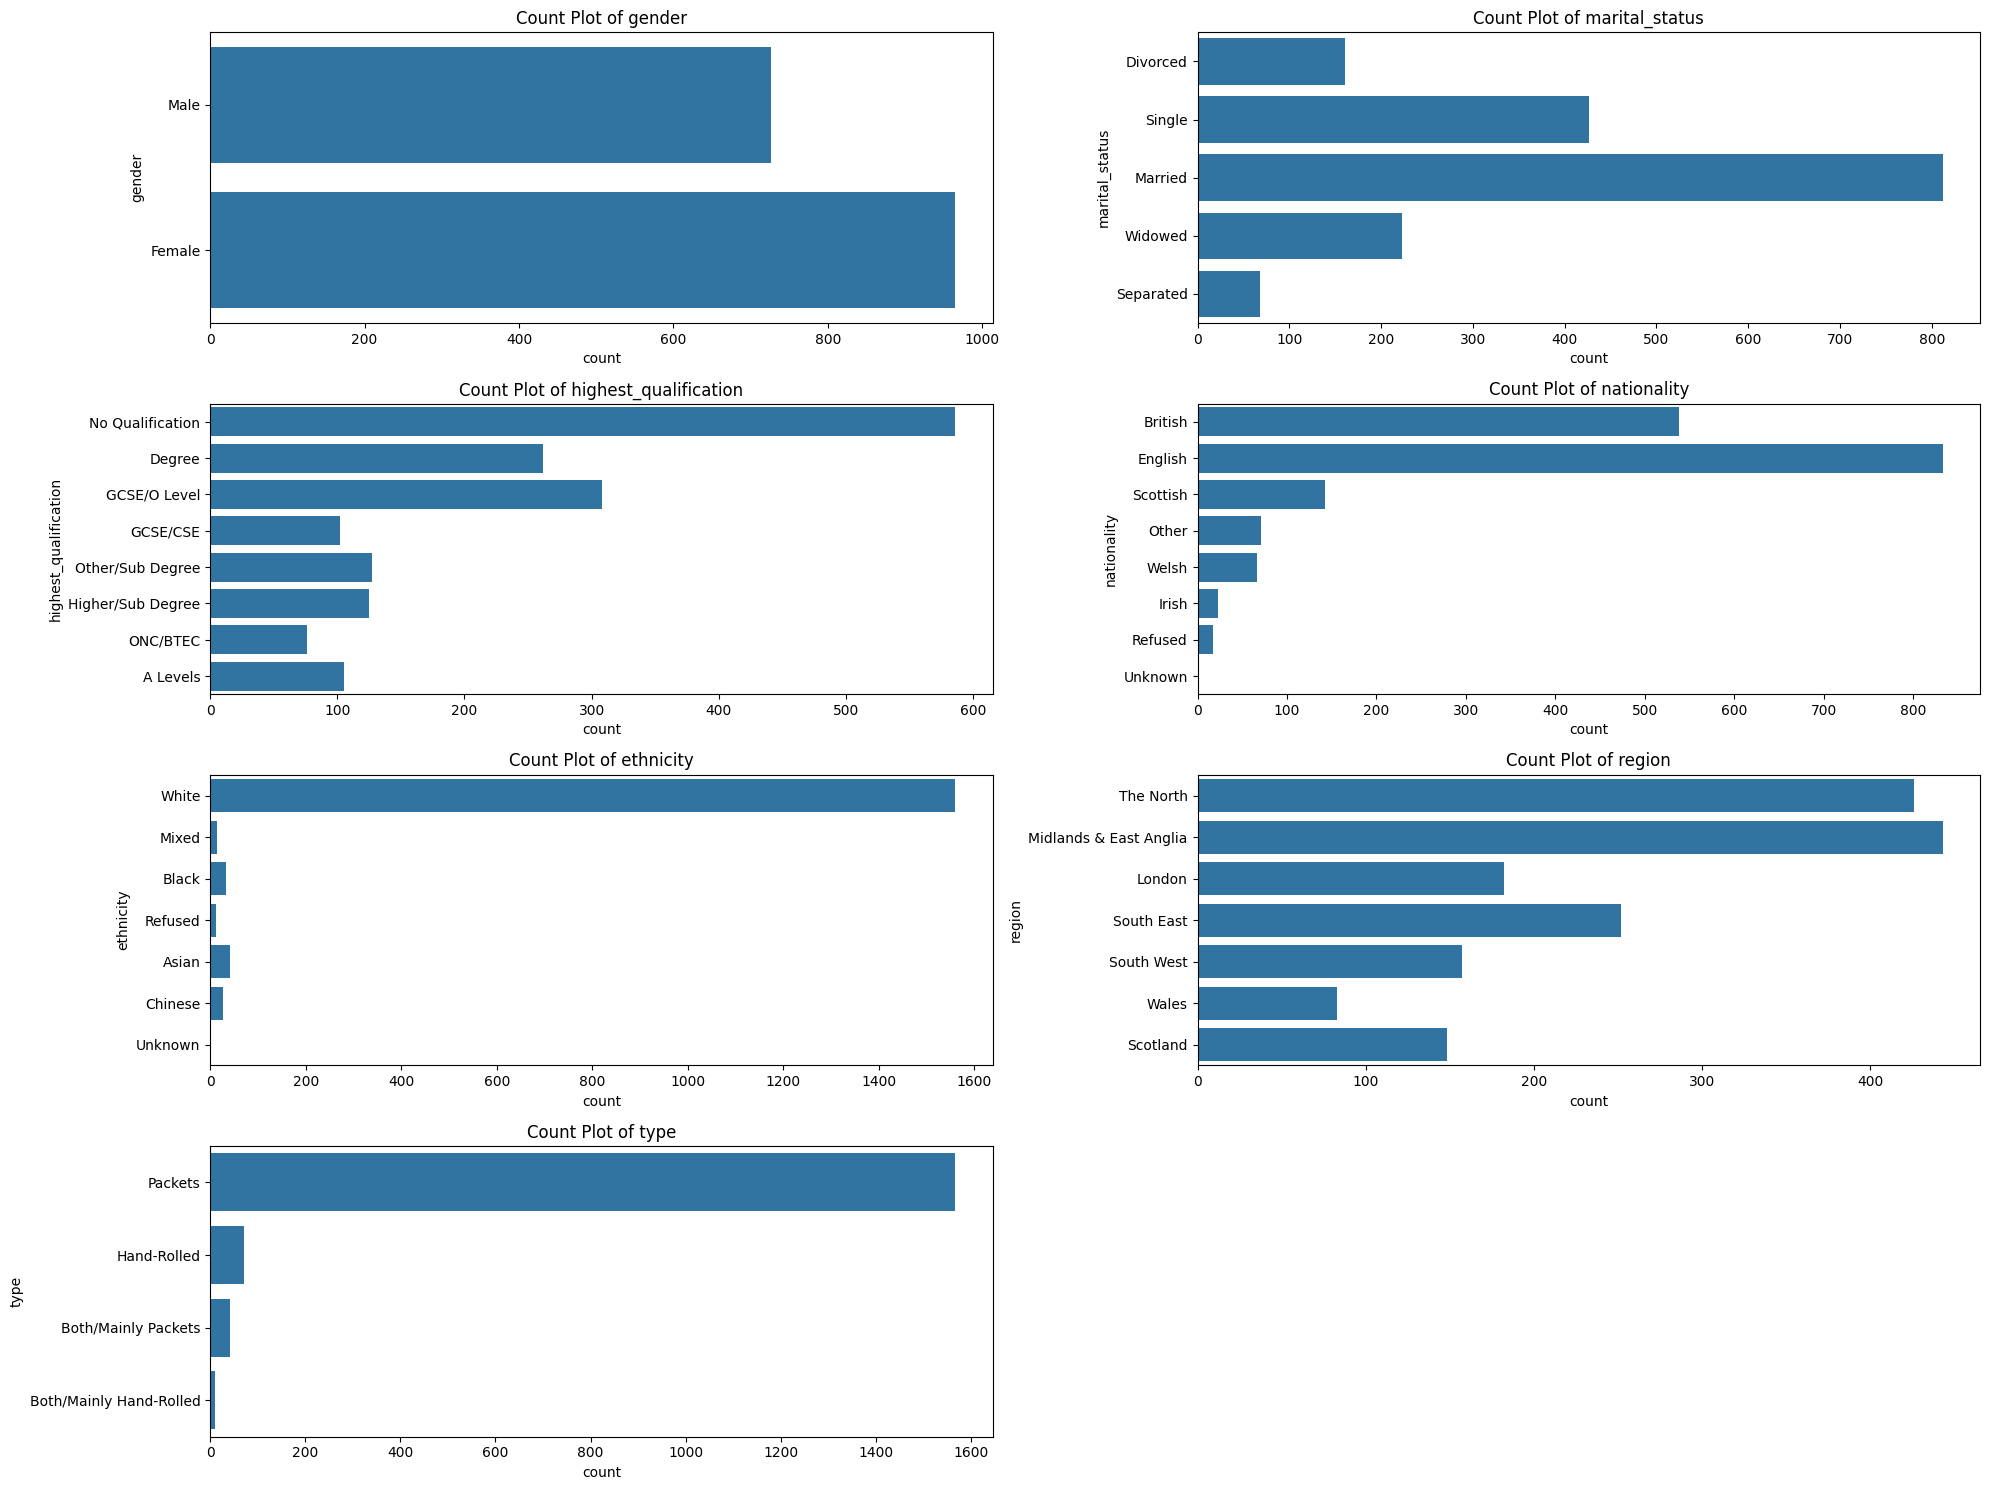

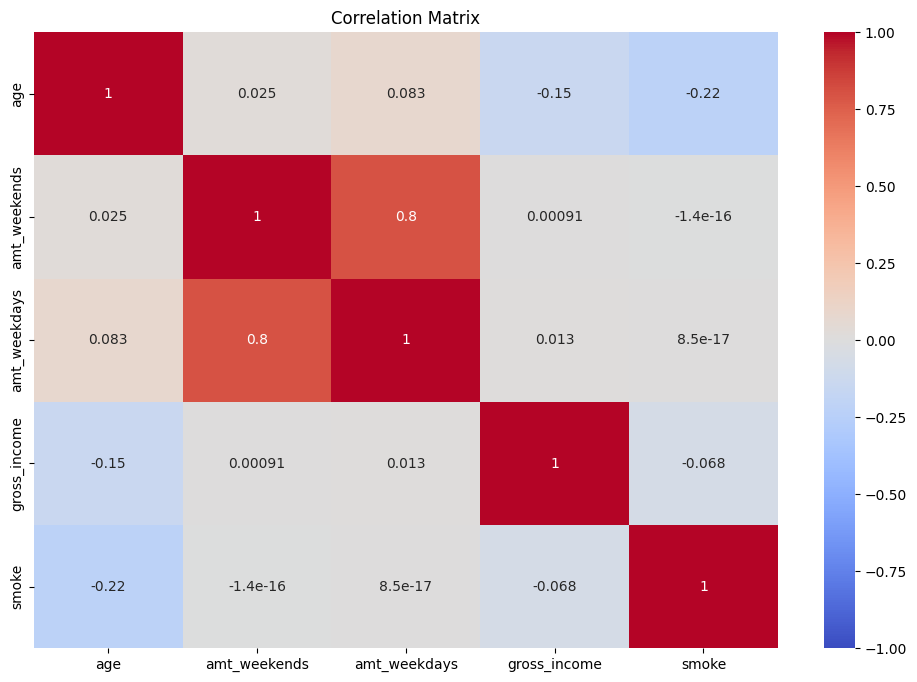

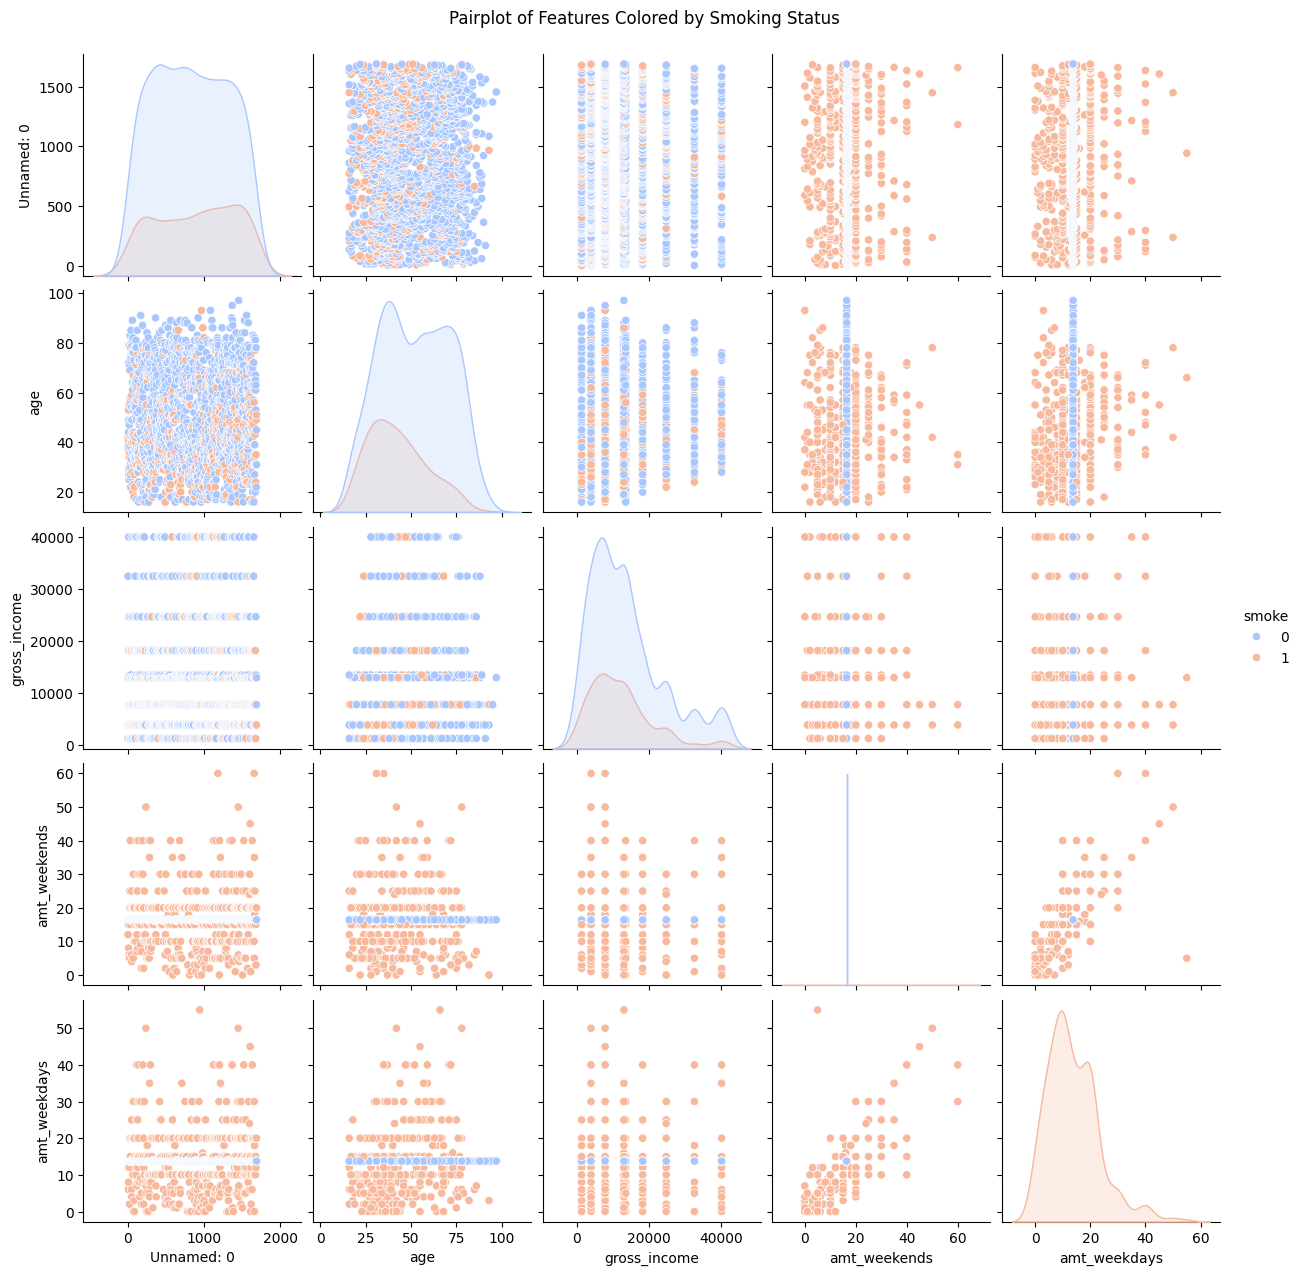

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
data = pd.read_csv('smoking.csv')

# Data Cleaning and Preprocessing
data['amt_weekends'].fillna(data['amt_weekends'].mean(), inplace=True)
data['amt_weekdays'].fillna(data['amt_weekdays'].mean(), inplace=True)
data['type'].fillna(data['type'].mode()[0], inplace=True)

# Convert `gross_income` to numerical values
def income_to_midpoint(income):
    if pd.isna(income) or income == 'Refused':
        return np.nan
    elif ' to ' in income:
        low, high = income.replace(',', '').split(' to ')
        return (int(low) + int(high)) / 2
    elif 'Under ' in income:
        return int(income.replace('Under ', '').replace(',', '')) / 2
    elif 'Above ' in income:
        return int(income.replace('Above ', '').replace(',', '')) * 1.1 
    return np.nan

data['gross_income'] = data['gross_income'].apply(income_to_midpoint)
data['gross_income'].fillna(data['gross_income'].mean(), inplace=True)

data['smoke'] = data['smoke'].apply(lambda x: 1 if x == 'Yes' else 0)

X = data.drop(['smoke'], axis=1)
y = data['smoke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'amt_weekends', 'amt_weekdays', 'gross_income']
categorical_features = ['gender', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'region', 'type']

scaler = StandardScaler()
X_train_scaled = X_train.copy()  
X_test_scaled = X_test.copy()  
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

X_train_scaled = pd.get_dummies(X_train_scaled, columns=categorical_features)
X_test_scaled = pd.get_dummies(X_test_scaled, columns=categorical_features)

X_train_scaled, X_test_scaled = X_train_scaled.align(X_test_scaled, join='left', axis=1, fill_value=0)

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_score = linear_reg.score(X_test_scaled, y_test)
print("Linear Regression Accuracy:", linear_reg_score)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_reg_score = poly_reg.score(X_test_poly, y_test)
print("Polynomial Regression (2nd degree) Accuracy:", poly_reg_score)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_score = lasso_reg.score(X_test_scaled, y_test)
print("Lasso Regression Accuracy:", lasso_reg_score)

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train_scaled, y_train)
ridge_reg_score = ridge_reg.score(X_test_scaled, y_test)
print("Ridge Regression Accuracy:", ridge_reg_score)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_score = svm_classifier.score(X_test_scaled, y_test)
print("SVM Accuracy:", svm_score)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)
random_forest_score = random_forest.score(X_test_scaled, y_test)
print("Random Forest Accuracy:", random_forest_score)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
decision_tree_score = decision_tree.score(X_test_scaled, y_test)
print("Decision Tree Accuracy:", decision_tree_score)

models = {
    'Linear Regression': linear_reg,
    'Polynomial Regression': poly_reg,
    'Lasso Regression': lasso_reg,
    'Ridge Regression': ridge_reg,
    'SVM': svm_classifier,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree
}

for name, model in models.items():
    if name == 'Polynomial Regression':
        y_pred = model.predict(X_test_poly)
        y_pred = np.round(y_pred).astype(int) 
    else:
        y_pred = model.predict(X_test_scaled)
        if name in ['Linear Regression', 'Lasso Regression', 'Ridge Regression']:
            y_pred = np.round(y_pred).astype(int)  
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

print("Descriptive Statistics:")
print(data.describe(include='all'))

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y=data[feature])
    plt.title(f"Count Plot of {feature}")

plt.tight_layout()
plt.show()

numerical_data = data[numerical_features + ['smoke']]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(data, hue='smoke', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairplot of Features Colored by Smoking Status", y=1.02)
plt.show()
